In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import random

In [85]:
sz = np.array([500,500])
aspect_ratio = sz[1]/sz[0]
coordinates_x = np.ones([sz[0],1]) @ np.array([range(sz[1])])*aspect_ratio/sz[1]
coordinates_y = (np.array([range(sz[0])])/sz[0]).T * np.ones([1,sz[1]])
wavenumbers_1d_x = np.int64(np.array([np.fft.fftfreq(sz[1]) * sz[1]]))
n_fft_points_x = wavenumbers_1d_x.shape[1]
wavenumbers_1d_y = np.int64(np.array([np.fft.fftfreq(sz[0]) * sz[0]]))
n_fft_points_y = wavenumbers_1d_y.shape[1]
wavenumbers_x = np.ones([n_fft_points_y,1]) @ wavenumbers_1d_x
wavenumbers_y = wavenumbers_1d_y.T @ np.ones([1,n_fft_points_x])
w_x_w_y = wavenumbers_x*wavenumbers_x+wavenumbers_y*wavenumbers_y
k = 0.1
flter = np.exp(-k*w_x_w_y)


def curl_fft_UV(U,V):
    d_u_d_y_fft = 1j * wavenumbers_y * np.fft.fft2(U)
    d_v_d_x_fft = 1j * wavenumbers_x * np.fft.fft2(V)
    curl_fft = d_v_d_x_fft - d_u_d_y_fft
    # curl_fft *= flter
    return curl_fft
def curl_diagram(curl_fft):
    curl = np.fft.ifft2(curl_fft, sz)
    curl = np.real(curl)
    plt.imshow(curl)
    return curl

[[ 0.  1.  2. ... -3. -2. -1.]
 [ 0.  1.  2. ... -3. -2. -1.]
 [ 0.  1.  2. ... -3. -2. -1.]
 ...
 [ 0.  1.  2. ... -3. -2. -1.]
 [ 0.  1.  2. ... -3. -2. -1.]
 [ 0.  1.  2. ... -3. -2. -1.]]


-1.455191522836685e-17

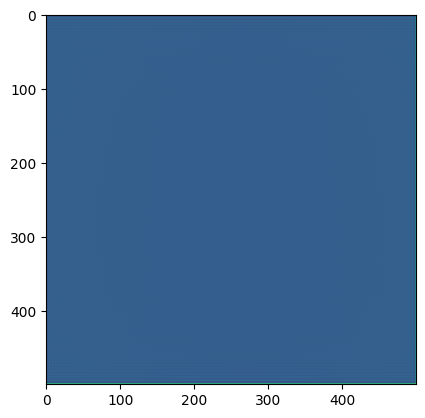

In [86]:
U = np.zeros(sz)
V = np.zeros(sz)

x_ordinates = np.arange(sz[1])
y_ordinates = np.arange(sz[0])
#Create a meshgrid
X, Y = np.meshgrid(x_ordinates, y_ordinates)
r1 = np.random.randint(50,200)
r2 = np.random.randint(50,200)
r3 = np.random.randint(50,200)
r4 = np.random.randint(50,200)
U = np.sin(Y/r1+r3)
V = np.sin(X/r2+r4)
np.mean(curl_diagram(curl_fft_UV(U,V)))
